In [89]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve

# Import data of stocks

Data imported consists of:
1) Adjusted closing price of each trading day
<br>
2) Volume of each trading day
<br>
3) Market cap of each stock

In [14]:
# Select stocks and download adjusted closing prices from the last 2-3 years

tickers = ["AAPL", "TSLA", "MRNA", "NIO", "XPEV", "LCID", "SQ", "META", "LI", "PYPL", "AMD", "DIS", "NFLX", "AMZN", "PFE",
            "NVDA", "GFS", "QQQ", "VTI", "INTC", "MRVL", "SNAP", "ON", "CRM", "SHOP", "COST", "JNJ", "LMT", "MSFT", "ETSY",
           "BLDP", "ICLN", "ZM", "PLTR", "ROKU", "TSM", "PSFE", "TWTR", "FUBO", "NET", "MVST", "TLRY", "QS", "NOK", "BB", 
           "RBLX", "GME", "PLUG", "GEVO", "WEBR", "AMC", "BBBY"]
stocks = yf.download(tickers, start = '2020-01-01', end = '2022-08-05')["Adj Close"]
volume = yf.download(tickers, start = '2020-01-01', end = '2022-08-04')["Volume"]

[*********************100%***********************]  52 of 52 completed
[*********************100%***********************]  52 of 52 completed


In [15]:
# Remove missing data 
stocks.drop(stocks.tail(1).index,inplace=True) # No data from August 5, 2022
volume.drop(volume.tail(1).index,inplace=True) # No volume data on Aug 4, 2022

In [16]:
# Replace all NaN with 0s
stocks = stocks.fillna(0)
volume = volume.fillna(0)

In [29]:
volume

,AAPL,AMC,AMD,AMZN,BB,BBBY,BLDP,COST,CRM,DIS,...,SNAP,SQ,TLRY,TSLA,TSM,TWTR,VTI,WEBR,XPEV,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,135480400.0,4545900.0,80331100.0,80580000.0,5348900.0,6695000.0,3055700.0,2103600.0,5189300.0,9502100.0,...,26062600.0,5264700.0,3668700.0,47660500.0,8432600.0,10721100.0,3291100.0,0.0,0.0,1315500.0
2020-01-03,146322800.0,2218000.0,73127400.0,75288000.0,3658200.0,4116400.0,1984600.0,1926000.0,3205400.0,7320200.0,...,19761500.0,5087100.0,2280600.0,88892500.0,10546400.0,14429500.0,3625400.0,0.0,0.0,1127900.0
2020-01-06,118387200.0,2903400.0,47934900.0,81236000.0,7882700.0,8120600.0,3192000.0,2655100.0,8836200.0,8262500.0,...,15952600.0,5905200.0,3035700.0,50665000.0,8897200.0,12582500.0,6813800.0,0.0,0.0,3151600.0
2020-01-07,108872000.0,3205300.0,58061400.0,80898000.0,6362700.0,7960500.0,2704200.0,1963400.0,8272700.0,6906500.0,...,21146400.0,10368200.0,2038700.0,89410500.0,7444300.0,13712900.0,2498400.0,0.0,0.0,6985400.0
2020-01-08,132079200.0,6557000.0,53767000.0,70160000.0,4983800.0,13688800.0,1756600.0,2492800.0,7225100.0,6984200.0,...,15600900.0,11899200.0,3023300.0,155721500.0,5381500.0,14632400.0,4244800.0,0.0,0.0,2482300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,81378700.0,24618700.0,79009200.0,82245500.0,4576900.0,3902000.0,11095900.0,2083300.0,4562100.0,7970300.0,...,97531200.0,11281600.0,38507900.0,28241000.0,10668200.0,10153600.0,2670700.0,247400.0,7911700.0,2380000.0
2022-07-29,101689200.0,18222500.0,76575900.0,148715600.0,6139700.0,8384000.0,5434500.0,2130900.0,4751400.0,10314800.0,...,74418900.0,10545100.0,23573600.0,31771000.0,10361500.0,11787700.0,3341900.0,388200.0,7575100.0,3974500.0
2022-08-01,67829400.0,23919700.0,96477500.0,76846900.0,5165100.0,11455300.0,3610800.0,2256000.0,3997100.0,7769700.0,...,50125600.0,11563100.0,20665500.0,39014300.0,20102600.0,14094800.0,3531500.0,532300.0,13837700.0,2386200.0


In [20]:
# Import market capitalization of each stock
# Cannot download using the same syntax as before
watchlist_markcap = []
for item in tickers:
    item = yf.Ticker(item)
    watchlist_markcap.append(item.info["marketCap"])
    print(item)

yfinance.Ticker object <AAPL>
yfinance.Ticker object <TSLA>
yfinance.Ticker object <MRNA>
yfinance.Ticker object <NIO>
yfinance.Ticker object <XPEV>
yfinance.Ticker object <LCID>
yfinance.Ticker object <SQ>
yfinance.Ticker object <META>
yfinance.Ticker object <LI>
yfinance.Ticker object <PYPL>
yfinance.Ticker object <AMD>
yfinance.Ticker object <DIS>
yfinance.Ticker object <NFLX>
yfinance.Ticker object <AMZN>
yfinance.Ticker object <PFE>
yfinance.Ticker object <NVDA>
yfinance.Ticker object <GFS>
yfinance.Ticker object <QQQ>
yfinance.Ticker object <VTI>
yfinance.Ticker object <INTC>
yfinance.Ticker object <MRVL>
yfinance.Ticker object <SNAP>
yfinance.Ticker object <ON>
yfinance.Ticker object <CRM>
yfinance.Ticker object <SHOP>
yfinance.Ticker object <COST>
yfinance.Ticker object <JNJ>
yfinance.Ticker object <LMT>
yfinance.Ticker object <MSFT>
yfinance.Ticker object <ETSY>
yfinance.Ticker object <BLDP>
yfinance.Ticker object <ICLN>
yfinance.Ticker object <ZM>
yfinance.Ticker object <PLTR

In [21]:
# Create a dataframe containing stock tickers and the market caps
mcap = pd.DataFrame(list(zip(tickers, watchlist_markcap)), columns=["ticker", "marketCap"])
mcap

,ticker,marketCap
0,AAPL,2.657307e+12
1,TSLA,9.029720e+11
2,MRNA,7.309181e+10
3,NIO,3.498545e+10
4,XPEV,2.027501e+10
5,LCID,3.019422e+10
6,SQ,5.177772e+10
7,META,4.491165e+11
8,LI,3.268049e+10
9,PYPL,1.102357e+11


In [25]:
# Fill in NaN values with the market caps (obtained from a Google search)

# mcap.fillna(125660000000, limit=1, inplace=True)
# mcap.fillna(169980000000, limit=1, inplace=True)
mcap.fillna(2560000000, limit=1, inplace=True)
mcap

,ticker,marketCap
0,AAPL,2.657307e+12
1,TSLA,9.029720e+11
2,MRNA,7.309181e+10
3,NIO,3.498545e+10
4,XPEV,2.027501e+10
5,LCID,3.019422e+10
6,SQ,5.177772e+10
7,META,4.491165e+11
8,LI,3.268049e+10
9,PYPL,1.102357e+11


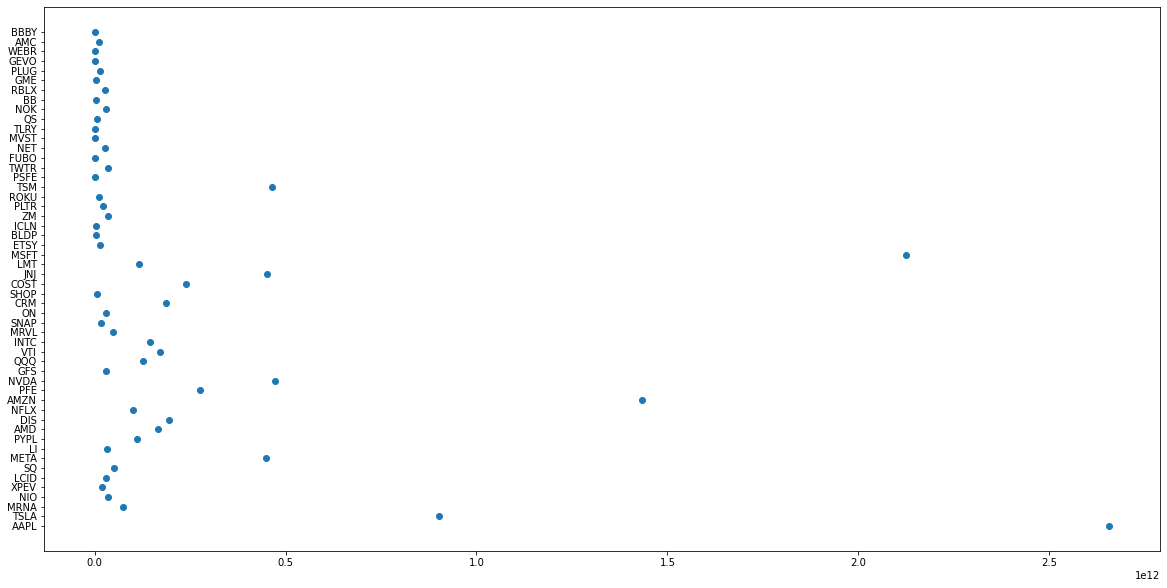

In [26]:
# Visualize market cap spread

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(mcap["marketCap"], mcap["ticker"]) 
pass

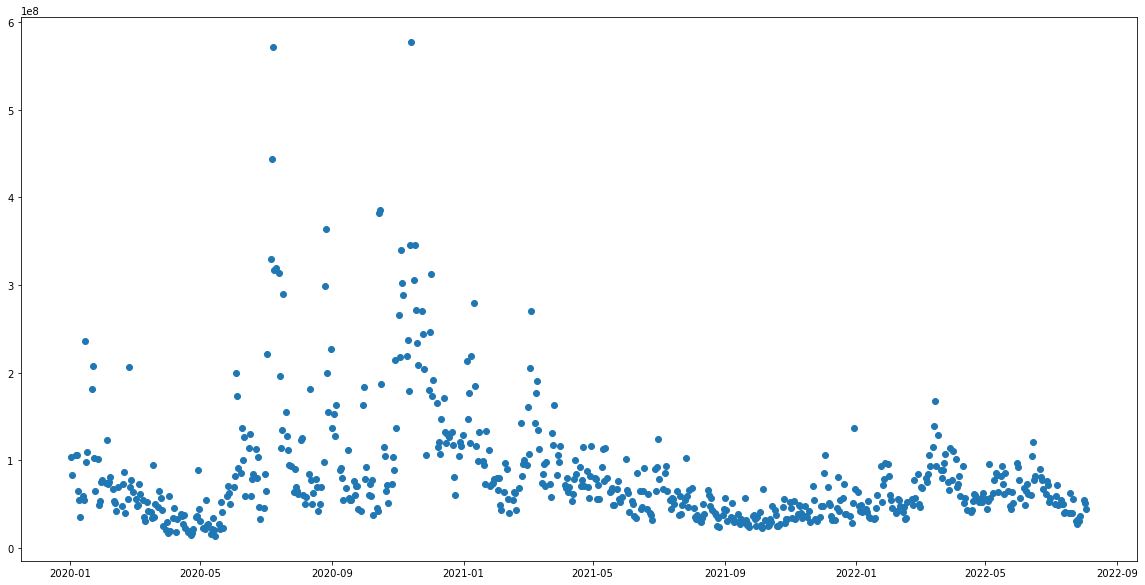

In [36]:
# View volume of trades for NIO since January 1, 2020

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(volume.index, volume["NIO"]) 
pass

In [43]:
# Check for NaN sums
stocks.isna().sum(), volume.isna().sum(), mcap.isna().sum()

(AAPL    0
 AMC     0
 AMD     0
 AMZN    0
 BB      0
 BBBY    0
 BLDP    0
 COST    0
 CRM     0
 DIS     0
 ETSY    0
 FUBO    0
 GEVO    0
 GFS     0
 GME     0
 ICLN    0
 INTC    0
 JNJ     0
 LCID    0
 LI      0
 LMT     0
 META    0
 MRNA    0
 MRVL    0
 MSFT    0
 MVST    0
 NET     0
 NFLX    0
 NIO     0
 NOK     0
 NVDA    0
 ON      0
 PFE     0
 PLTR    0
 PLUG    0
 PSFE    0
 PYPL    0
 QQQ     0
 QS      0
 RBLX    0
 ROKU    0
 SHOP    0
 SNAP    0
 SQ      0
 TLRY    0
 TSLA    0
 TSM     0
 TWTR    0
 VTI     0
 WEBR    0
 XPEV    0
 ZM      0
 dtype: int64,
 AAPL    0
 AMC     0
 AMD     0
 AMZN    0
 BB      0
 BBBY    0
 BLDP    0
 COST    0
 CRM     0
 DIS     0
 ETSY    0
 FUBO    0
 GEVO    0
 GFS     0
 GME     0
 ICLN    0
 INTC    0
 JNJ     0
 LCID    0
 LI      0
 LMT     0
 META    0
 MRNA    0
 MRVL    0
 MSFT    0
 MVST    0
 NET     0
 NFLX    0
 NIO     0
 NOK     0
 NVDA    0
 ON      0
 PFE     0
 PLTR    0
 PLUG    0
 PSFE    0
 PYPL    0
 QQQ  

## Optional step

To select the stock(s) for machine learning, here we chose based on the average volume

In [44]:
volume.mean(axis=0).sort_values(ascending=False)

AAPL    1.166994e+08
NIO     8.351524e+07
AMZN    8.268294e+07
AMD     6.673566e+07
AMC     5.900241e+07
QQQ     5.218518e+07
TSLA    4.622762e+07
NVDA    4.489061e+07
PLTR    3.852386e+07
NOK     3.633486e+07
GME     3.600528e+07
MSFT    3.229505e+07
PFE     3.209293e+07
INTC    3.203146e+07
SNAP    2.955166e+07
PLUG    2.556842e+07
META    2.369197e+07
SHOP    2.246115e+07
LCID    2.167893e+07
TWTR    2.155672e+07
TLRY    2.125467e+07
BB      1.567316e+07
GEVO    1.450670e+07
MRNA    1.382816e+07
SQ      1.251074e+07
DIS     1.241347e+07
XPEV    1.169929e+07
PYPL    1.137236e+07
LI      1.057063e+07
RBLX    1.023030e+07
TSM     1.019544e+07
BBBY    9.439185e+06
MRVL    9.349566e+06
FUBO    8.535519e+06
QS      7.837313e+06
JNJ     7.576731e+06
ROKU    7.407230e+06
ON      7.340123e+06
CRM     6.971535e+06
NFLX    6.731298e+06
ZM      6.675432e+06
PSFE    5.980141e+06
NET     4.680040e+06
ICLN    4.446159e+06
BLDP    4.435219e+06
VTI     4.376561e+06
ETSY    3.549995e+06
COST    2.544

## Creating the model

Now that we've explored and cleaned the datasets, we can work on creating and evaluating the machine learning model.

This time, the model will be on NIO and evaluating which stock(s) affect price movements of NIO. 

In [47]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(stocks.drop("NIO", axis=1), stocks["NIO"])

CPU times: total: 1.48 s
Wall time: 249 ms


RandomForestRegressor(n_jobs=-1)

In [49]:
model.score(stocks.drop("NIO", axis=1), stocks["NIO"])

0.9992057582057224

In [51]:
X = stocks.drop("NIO", axis=1)
y = stocks["NIO"].values

X_train, X_test, y_train, y_test = train_test_split(X, #independent variables
                                                    y, # dependent variable
                                                   test_size = 0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((522, 51), (522,), (131, 51), (131,))

In [52]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1.14 s
Wall time: 200 ms


RandomForestRegressor(n_jobs=-1)

In [53]:
score = model.score(X_train, y_train)
print("R-squared", score)

R-squared 0.9987648938225193


In [54]:
y_pred = model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  1.5850118380714124
RMSE:  0.7925059190357062


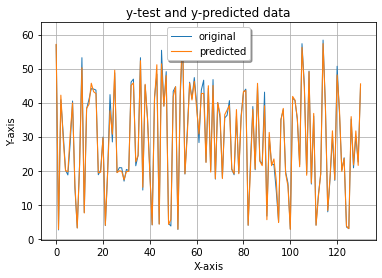

In [56]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Tuning the hyperparameters

The model does pretty well, but can it be better?

In [57]:
%%time

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(random_state=25), #random_state sets like np.random.seed()
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 9.98 s
Wall time: 9.97 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': None}

In [59]:
score2 = rs_model.score(X_train, y_train)
print("R-squared", score2)

R-squared 0.9941285719538545


In [61]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=5,
                                    min_samples_split=14,
                                    max_features="sqrt",
                                    max_depth=None,
                                    n_jobs=-1,
                                    random_state=25, #so the model is reproducible
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=14, n_estimators=40, n_jobs=-1,
                      random_state=25)

In [62]:
ideal_y_pred = ideal_model.predict(X_test)

ideal_mse = mean_squared_error(y_test, ideal_y_pred)
print("Ideal MSE: ", ideal_mse)
print("Ideal RMSE: ", ideal_mse*(1/2.0))

Ideal MSE:  3.4244833381330975
Ideal RMSE:  1.7122416690665487


In [63]:
score3 = ideal_model.score(X_train, y_train)
print("R-squared", score3)

R-squared 0.9941285719538545


Seems that the original model may have done better, but since we're just identifying the relationships this time, let's try to plot the feature importances of the ideal and the original model.

In [65]:
ideal_model.feature_importances_, model.feature_importances_

(array([1.90047984e-02, 2.71294823e-03, 3.22808671e-03, 1.82040864e-03,
        1.75830739e-02, 1.20594248e-03, 1.75380352e-02, 4.11872444e-03,
        1.76387836e-02, 3.59293310e-02, 1.81572554e-02, 2.84862728e-02,
        4.11682774e-03, 3.92467835e-05, 3.78001215e-03, 8.32594461e-02,
        1.43614480e-03, 4.26691659e-03, 1.75494286e-03, 2.31407984e-02,
        2.44669796e-03, 7.47732720e-04, 2.32485416e-04, 2.16279485e-03,
        1.99432035e-03, 1.47803091e-02, 5.13118614e-03, 9.92374901e-04,
        4.46097120e-04, 2.29546731e-03, 2.07098759e-03, 2.51574265e-04,
        9.81284029e-02, 1.77992036e-02, 2.53611510e-02, 6.35820857e-04,
        6.94932440e-03, 2.71631787e-02, 1.77906045e-03, 1.49478457e-01,
        7.68673758e-04, 1.00368666e-01, 1.01682997e-01, 2.83893597e-03,
        3.69002848e-02, 3.28180869e-02, 3.55939562e-02, 4.10673581e-03,
        3.68190699e-05, 2.69202243e-02, 7.89999748e-03]),
 array([1.88631475e-02, 3.91953487e-04, 7.71800731e-04, 2.38917921e-04,
      

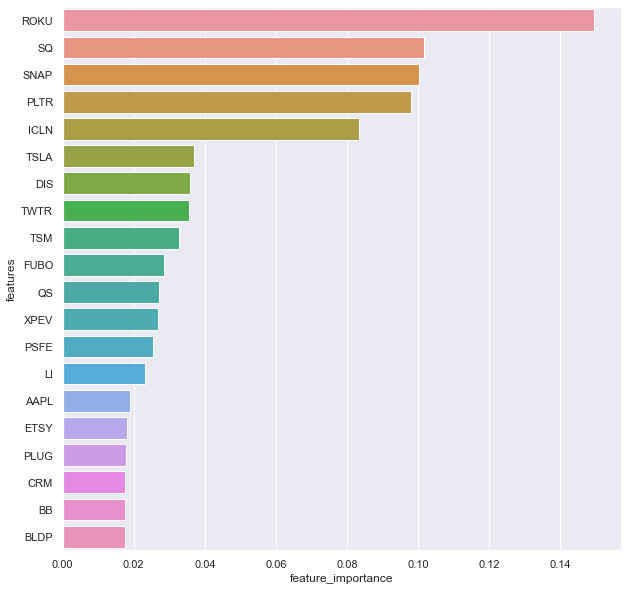

In [67]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True)) # does pd.DataFrame, .sort_values, and .reset_index all in one; called chaining
    sns.set(rc={'figure.figsize':(10,10)})
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

# The "ideal" model's feature importances
plot_features(X_train.columns, ideal_model.feature_importances_)

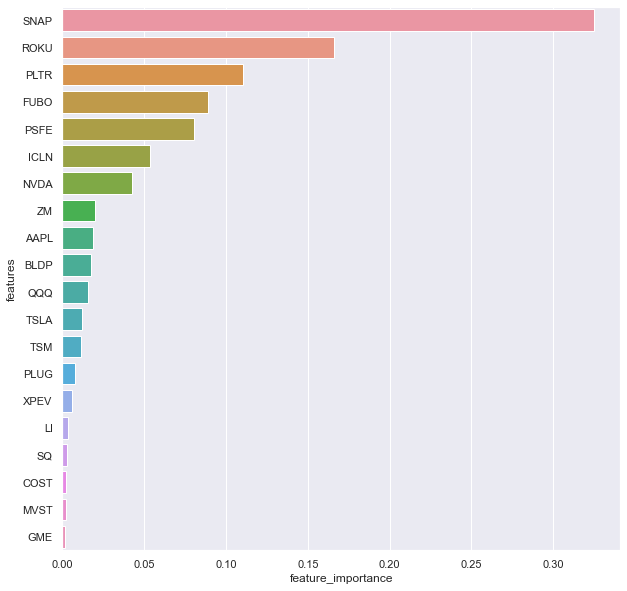

In [68]:
plot_features(X_train.columns, model.feature_importances_)

In [69]:
sum(ideal_model.feature_importances_), sum(model.feature_importances_)

(0.9999999999999998, 1.0)

## Results

Interestingly, the top 5 feature importances of the ideal and "not" ideal models are quite different. Importantly, one of the leading features in the ideal model (SQ) is one of the least important features in the original model. 

## Creating a predictive regression model and comparing based on actual prices

The next model aims to create a Random Forest Regressor to predict future prices, but to see how well this model works, we will be subsetting a portion of the data to predict a "future" price and comparing it with the actual price on the last trading day (August 4, 2022).

In [70]:
# Transpose the adjusted prices dataframe 
t_stocks = stocks.T

In [94]:
X2 = t_stocks.drop("2022-08-04", axis=1).iloc[:, -70:] # Choosing the last 70 entries (i.e., 70 most recent trading days)
y2 = t_stocks["2022-08-04"].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, #independent variables
                                                    y2, # dependent variable
                                                   test_size = 0.15)
X_train2, X_test2, y_train2, y_test2

(Date  2022-04-25  2022-04-26  2022-04-27  2022-04-28  2022-04-29  2022-05-02  \
 GEVO    3.850000    3.680000    3.740000    3.850000    3.710000    3.820000   
 SHOP   45.921001   42.808998   41.619999   44.327999   42.681999   45.298000   
 PLTR   12.110000   11.120000   10.560000   10.950000   10.400000   10.740000   
 TSLA  998.020020  876.419983  881.510010  877.510010  870.760010  902.940002   
 PFE    48.180191   48.258934   48.957767   49.715652   48.298302   47.579784   
 MSFT  280.067688  269.592102  282.561890  288.957001  276.875122  283.808990   
 AMC    16.959999   15.500000   15.850000   15.640000   15.300000   15.260000   
 AAPL  162.415436  156.352783  156.123444  163.173264  157.200348  157.509476   
 ETSY  102.059998  100.110001   97.550003  101.879997   93.190002   97.070000   
 ON     53.480000   51.360001   51.209999   54.480000   52.110001   55.619999   
 PSFE    2.930000    2.810000    2.820000    2.960000    2.780000    2.910000   
 XPEV   24.209999   22.70999

In [95]:
warnings.filterwarnings('ignore')
model.fit(X_train2, y_train2)
score4 = model.score(X_train2, y_train2)
print("R-squared", score4)

R-squared 0.986235757721388


In [97]:
warnings.filterwarnings('ignore')
y_pred2 = model.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  111.90535545226045
RMSE:  55.952677726130226


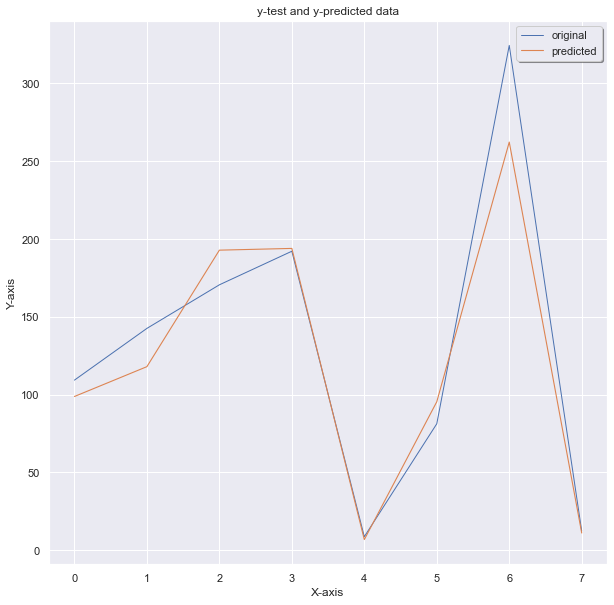

In [77]:
x_ax2 = range(len(y_test2))
plt.plot(x_ax2, y_test2, linewidth=1, label="original")
plt.plot(x_ax2, y_pred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [98]:
warnings.filterwarnings('ignore')
rs_model.fit(X_train2, y_train2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [79]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [99]:
warnings.filterwarnings('ignore')
ideal_model2 = RandomForestRegressor(n_estimators=20,
                                    min_samples_leaf=1,
                                    min_samples_split=16,
                                    max_features="sqrt",
                                    max_depth=3,
                                    n_jobs=-1,
                                    random_state=25, #so the model is reproducible
                                    max_samples=None)
ideal_model2.fit(X_train2, y_train2)
ideal_y_pred2 = ideal_model2.predict(X_test2)

ideal_mse2 = mean_squared_error(y_test2, ideal_y_pred2)
print("Ideal MSE: ", ideal_mse)
print("Ideal RMSE: ", ideal_mse*(1/2.0))

Ideal MSE:  3.4244833381330975
Ideal RMSE:  1.7122416690665487


In [100]:
warnings.filterwarnings('ignore')
test_preds = ideal_model2.predict(X_test2)
X_test2["preds"] = test_preds
X_test2

Date,2022-04-25 00:00:00,2022-04-26 00:00:00,2022-04-27 00:00:00,2022-04-28 00:00:00,2022-04-29 00:00:00,2022-05-02 00:00:00,2022-05-03 00:00:00,2022-05-04 00:00:00,2022-05-05 00:00:00,2022-05-06 00:00:00,...,2022-07-22 00:00:00,2022-07-25 00:00:00,2022-07-26 00:00:00,2022-07-27 00:00:00,2022-07-28 00:00:00,2022-07-29 00:00:00,2022-08-01 00:00:00,2022-08-02 00:00:00,2022-08-03 00:00:00,preds
ICLN,19.218559,18.692158,18.920595,19.000051,18.712023,18.741819,19.039782,19.834347,19.059647,18.443857,...,19.500000,19.750000,19.440001,20.360001,21.790001,22.290001,22.010000,22.290001,21.820000,20.141816
NOK,5.188292,5.068792,5.019000,4.879583,5.019000,5.130000,5.230000,5.330000,5.110000,4.960000,...,5.100000,5.110000,5.040000,5.170000,5.200000,5.180000,5.230000,5.150000,5.220000,20.141816
SNAP,29.910000,28.690001,27.090000,28.809999,28.459999,29.520000,28.930000,30.160000,27.270000,24.920000,...,9.960000,9.950000,9.630000,9.550000,9.670000,9.880000,9.540000,9.870000,10.320000,20.141816
AMZN,146.074005,139.391006,138.167007,144.596497,124.281502,124.500000,124.253502,125.928497,116.406998,114.772499,...,122.419998,121.139999,114.809998,120.970001,122.279999,134.949997,135.389999,134.160004,139.520004,121.174057
DIS,119.949997,115.769997,115.209999,115.290001,111.629997,113.500000,113.550003,116.190002,112.610001,110.290001,...,102.720001,102.690002,99.779999,103.500000,104.900002,106.099998,106.220001,104.709999,109.019997,96.757803
INTC,46.224270,44.711620,44.416946,46.008175,42.815891,44.161564,44.259789,45.713505,44.154243,43.857243,...,38.808216,38.768616,38.570614,39.778419,39.313118,35.947102,36.590603,35.650097,36.155003,27.575250
LI,22.309999,21.150000,22.180000,22.120001,22.430000,23.330000,22.930000,23.590000,21.670000,20.920000,...,34.360001,34.599998,33.549999,33.680000,32.930000,32.840000,34.099998,34.119999,33.980000,24.277992
NET,98.709999,90.739998,90.589996,95.250000,86.139999,89.910004,89.680000,90.400002,77.809998,65.610001,...,51.650002,49.790001,45.680000,48.680000,48.650002,50.320000,51.160000,53.080002,58.360001,57.183780


In [101]:
# "Ideal" model score
warnings.filterwarnings('ignore')
score5 = ideal_model2.score(X_train2, y_train2)
print("R-squared", score5)

R-squared 0.8955389316321993


In [86]:
# Outputs only the predicted price column and the tickers
preds_price = X_test2.iloc[:, -1:]

In [83]:
# Create data frame containing the tickers in the test data and output the actual values on the last trading day
check_ticker = ["ETSY", "AMZN", "META", "NVDA", "BLDP", "ROKU", "QQQ", "QS"]
check_ticker_price = []
for stock in check_ticker:
    check_ticker_price.append(t_stocks["2022-08-04"][stock])
    print(stock)
check_ticker_price = pd.DataFrame(list(zip(check_ticker, check_ticker_price)), columns=["ticker", "actual"])
check_ticker_price

ETSY
AMZN
META
NVDA
BLDP
ROKU
QQQ
QS


,ticker,actual
0,ETSY,109.330002
1,AMZN,142.570007
2,META,170.570007
3,NVDA,192.149994
4,BLDP,8.730000
5,ROKU,81.279999
6,QQQ,324.399994
7,QS,12.310000


In [85]:
# Change the dataframe so that the ticker prices are indices and the only column is the actual closing price
check_ticker_price_new = check_ticker_price.rename(index={0: "ETSY", 1: "AMZN", 2: "META", 3: "NVDA", 4: "BLDP", 5: "ROKU", 
                                                         6: "QQQ", 7: "QS"})
check_ticker_price_new = check_ticker_price_new.drop('ticker', axis=1)
check_ticker_price_new

,actual
ETSY,109.330002
AMZN,142.570007
META,170.570007
NVDA,192.149994
BLDP,8.730000
ROKU,81.279999
QQQ,324.399994
QS,12.310000


In [87]:
final_preds_price = pd.concat([preds_price, check_ticker_price_new], axis=1)
final_preds_price

,preds,actual
ETSY,94.378565,109.330002
AMZN,108.666446,142.570007
META,199.020380,170.570007
NVDA,199.020380,192.149994
BLDP,16.792526,8.730000
ROKU,94.378565,81.279999
QQQ,224.223506,324.399994
QS,16.792526,12.310000


## Results 

The model over/underestimates the prices of some stocks, this may be because the training data included too many dates. Prices from 3 months ago should not necessarily have a big impact on prices next week. Instead, this model may be improved by taking a smaller subset of data (e.g., 3 weeks) rather than a larger subset of data. 